# Visualizing AQI during the 2017 Thomas Fire in Santa Barbara County

## About the notebook

**Link to *my* Thomas Fire Analysis GitHub repository:**

https://github.com/YoselynR/Thomas-Fire-Analysis-YR/tree/main

## Purpose

The purpose of this notebook is to analyze and visualize the Air Quality Index (AQI) data for Santa Barbara County over the years 2017 and 2018, with a specific focus on the impact of environmental events, such as the Thomas Fire in December 2017 and air quality. 

## Highlights

- Combined AQI data for two years (2017 and 2018) into a single dataset, with a focus on the relevant columns for analysis (date, AQI, category, defining parameter, etc.).
- Filtered the dataset to include only the records related to Santa Barbara County, ensuring that the analysis is geographically presentable.
- Converted the date column to a datetime object and set it as the index, preparing the dataset for time series analysis. 
- The 5-day rolling average of the AQI was computed to smooth out daily fluctuations and better observe long-term trends in air quality.

## About the data

In this task you will use two data sets: which include Air Quality Index for the US by County.

Both datasets are from the [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) data from the [US Environmental Protection Agency](https://www.epa.gov) to visualize the impact on the AQI of the 2017 [Thomas Fire](https://en.wikipedia.org/wiki/Thomas_Fire) in Santa Barbara County.

U.S. Environmental Protection Agency. (n.d.). Air quality index (AQI) basics. AirNow. Retrieved December 12, 2024, from https://www.airnow.gov/aqi/aqi-basics/

### First dataset: 2017

For our convenience the dataset for 2017 is saved as daily_aqi_by_county_2017.csv in the data folder, available from [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/).

### Second dataset: 2018

For our convenience the dataset for 2018 is saved as daily_aqi_by_county_2018.csv in the data folder, available from [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/).


### Import libraries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read in data, combine datasets, and simplify column names

No data exploration will be made for this notebook to include only necessary code for the final output. Once data is read in per year, both datasets can be combined with `.concat`. To clean data for ease of filtering in the next step, the column names are lowercased and spaces are removed. 

In [ ]:
# Read in data, combine datasets, and simplify column names
# Read in data
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip')
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip')
# Combine datasets (2017 and 2018)
aqi = pd.concat([aqi_17, aqi_18])
# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ', '_')
                )

### Filter for Santa Barbara county, keep specific columns, convert `date` to datetime, save with date index, and add 5 day mean column

Next, Santa Barbara county is filtered including the columns date, aqi, category, defining_parameter, defining_site, and number_of_sites_reporting. Date needs to be converted to datetime to facilitate the steps that follow. Index is set to date and a rolling 5 day window by mean is added as a new column.

In [ ]:
# Filter for Santa Barbara, keep specific columns, convert `date` to datetime, save with date index, and add 5 day mean column
# Save filtered (Santa Barbara) data 
aqi_sb = aqi[aqi['county_name'] == 'Santa Barbara']
# Keep only specific columns (date, aqi, category, defining_parameter, defining_site, and number_of_sites_reporting)
aqi_sb = aqi_sb[['date', 'aqi', 'category', 'defining_parameter', 'defining_site', 'number_of_sites_reporting']]
# Convert specific object column (date) to datetime object
aqi_sb['date'] = pd.to_datetime(aqi_sb['date'])
# Save with new (date) index
aqi_sb = aqi_sb.set_index('date').sort_index()
# Add new 5 day mean column to data (Santa Barbara)
aqi_sb['five_day_average'] = aqi_sb['aqi'].rolling(window='5D').mean()

### Plot

Now, the  air quality index can be plotted with the daily and 5 day average to compare. The specific Thomas Fire is highlighted in yellow, appearing in the middle with 2017 to the left and 2018 to the right since the fire occured in December of 2017.

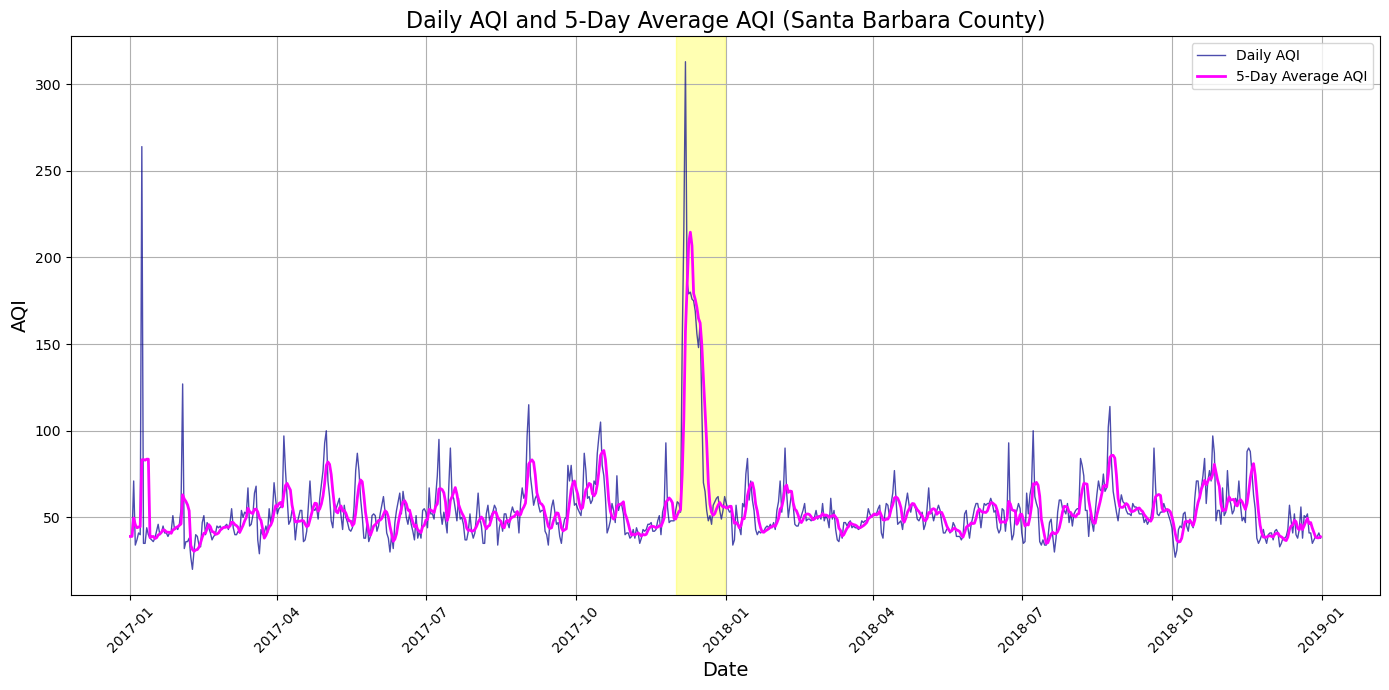

In [1]:
# Plot figure
plt.figure(figsize=(14, 7))
# Plot aqi , label, color, size, and transparency
plt.plot(aqi_sb.index, aqi_sb['aqi'], label='Daily AQI', color='darkblue', linewidth=1, alpha=0.7)
# Plot average, label, color, and size
plt.plot(aqi_sb.index, aqi_sb['five_day_average'], label='5-Day Average AQI', color='fuchsia', linewidth=2)
# Title and size
plt.title('Daily AQI and 5-Day Average AQI (Santa Barbara County)', fontsize=16)
# X label and size
plt.xlabel('Date', fontsize=14)
# Y label and size
plt.ylabel('AQI', fontsize=14)
# Rotate x-axis labels
plt.xticks(rotation=45)
# Legend
plt.legend()
# Grid
plt.grid() 
# Add shaded area for Thomas fire
plt.axvspan(pd.Timestamp('2017-12-01'), pd.Timestamp('2017-12-31'), color='yellow', alpha=0.3)
# Layout
plt.tight_layout()

# Show plot
plt.show()

The Thomas fire shows a spike in the aqi daily and 5 day average. I've highlighted the month of December to clarify the spike occurence. It is clear that the daily aqi was much higher than the 5 day average but it does remain high for a while. The daily aqi dropped from the highest point to where the average remained. For atleast half of the month of December the daily aqi and the 5 day average were above 150.